In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from datetime import datetime
import os

In [2]:
folder_path = '../datasets/province'
df = []
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df_read = pd.read_csv(file_path, skiprows=3)
        df.append(df_read )

df = pd.concat(df, ignore_index=True)
       
df.shape

(140168, 19)

In [3]:
df = df.dropna()
df.shape

(140000, 19)

In [112]:
df.head()

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,2010-01-01,1.0,31.3,21.0,25.9,34.8,22.3,28.2,2010-01-01T06:28,2010-01-01T17:41,0.0,0.0,0.0,0.0,15.3,27.7,52.0,17.41,3.90
1,2010-01-02,1.0,32.3,20.9,26.5,36.2,22.5,28.9,2010-01-02T06:29,2010-01-02T17:41,0.0,0.0,0.0,0.0,12.5,25.9,46.0,18.57,4.13
2,2010-01-03,1.0,30.9,21.8,26.0,33.5,23.0,27.4,2010-01-03T06:29,2010-01-03T17:42,0.0,0.0,0.0,0.0,16.8,36.4,44.0,16.45,4.39
3,2010-01-04,1.0,31.0,20.7,25.7,34.1,22.4,28.0,2010-01-04T06:29,2010-01-04T17:42,0.0,0.0,0.0,0.0,13.2,26.3,47.0,17.09,3.87
4,2010-01-05,1.0,31.8,21.8,27.0,34.6,24.2,29.5,2010-01-05T06:30,2010-01-05T17:43,0.0,0.0,0.0,0.0,10.2,27.4,140.0,16.03,3.83


In [92]:
# df.isna().sum()
df = df.rename(columns={'et0_fao_evapotranspiration (mm)':'et0'})
df.columns

Index(['time', 'weathercode (wmo code)', 'temperature_2m_max (°C)',
       'temperature_2m_min (°C)', 'temperature_2m_mean (°C)',
       'apparent_temperature_max (°C)', 'apparent_temperature_min (°C)',
       'apparent_temperature_mean (°C)', 'sunrise (iso8601)',
       'sunset (iso8601)', 'precipitation_sum (mm)', 'rain_sum (mm)',
       'snowfall_sum (cm)', 'precipitation_hours (h)',
       'windspeed_10m_max (km/h)', 'windgusts_10m_max (km/h)',
       'winddirection_10m_dominant (°)', 'shortwave_radiation_sum (MJ/m²)',
       'et0'],
      dtype='object')

In [93]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d')

reference_date = datetime(2010, 1, 1)
df['time'] = (df['time'] - reference_date).dt.days

df = df.sort_values(by='time', ascending=True)
df['time']

0            0
65078        0
15018        0
50060        0
135162       0
          ... 
115131    4999
120137    4999
125143    4999
65071     4999
140161    4999
Name: time, Length: 140000, dtype: int64

In [94]:
df['sunrise (iso8601)'].head()

0         2010-01-01T06:28
65078     2010-01-01T06:43
15018     2010-01-01T06:33
50060     2010-01-01T06:42
135162    2010-01-01T06:30
Name: sunrise (iso8601), dtype: object

In [95]:
df['sunrise'] = (pd.to_datetime(df['sunrise (iso8601)']).dt.hour * 3600) + (pd.to_datetime(df['sunrise (iso8601)']).dt.minute * 60) + pd.to_datetime(df['sunrise (iso8601)']).dt.second
df['sunset'] = (pd.to_datetime(df['sunset (iso8601)']).dt.hour * 3600) + (pd.to_datetime(df['sunset (iso8601)']).dt.minute * 60) + pd.to_datetime(df['sunset (iso8601)']).dt.second

df['sunrise'].head()

0         23280
65078     24180
15018     23580
50060     24120
135162    23400
Name: sunrise, dtype: int64

In [96]:
df['sunrise'].describe()

count    140000.000000
mean      22035.546429
std        1284.416870
min       19620.000000
25%       21060.000000
50%       21900.000000
75%       23100.000000
max       24660.000000
Name: sunrise, dtype: float64

In [97]:
df['suntime'] = df['sunset'] - df['sunrise']
df['suntime'].describe()

count    140000.000000
mean      43732.509429
std        2342.010222
min       39780.000000
25%       41460.000000
50%       43800.000000
75%       46020.000000
max       47520.000000
Name: suntime, dtype: float64

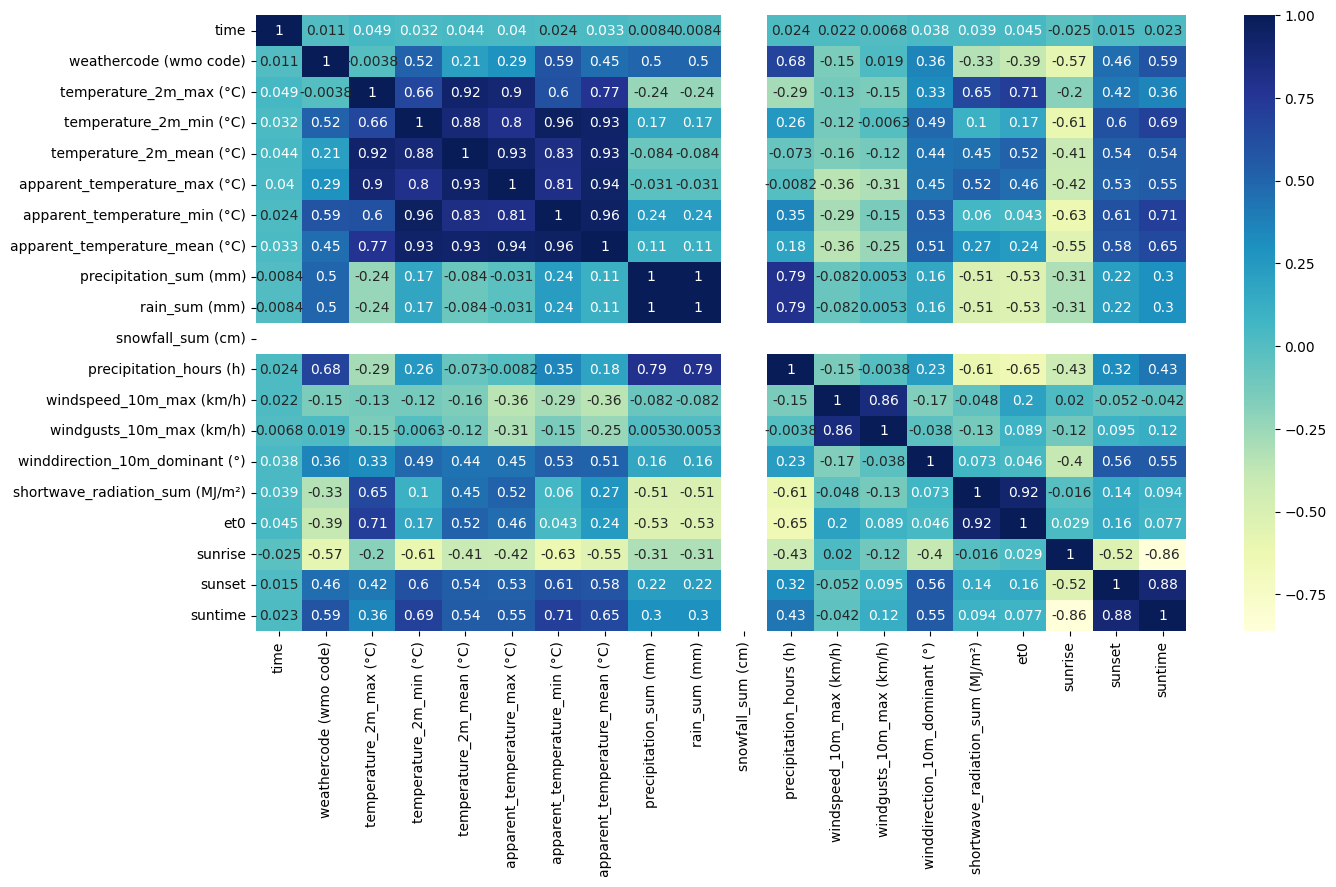

In [98]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [99]:
df_corr = df.corrwith(df['et0'])
high_corr = df_corr[abs(df_corr) >= 0.3]
high_corr.abs().sort_values(ascending=False)

et0                                1.000000
shortwave_radiation_sum (MJ/m²)    0.916222
temperature_2m_max (°C)            0.714181
precipitation_hours (h)            0.647752
precipitation_sum (mm)             0.526259
rain_sum (mm)                      0.526259
temperature_2m_mean (°C)           0.518666
apparent_temperature_max (°C)      0.463042
weathercode (wmo code)             0.392561
dtype: float64

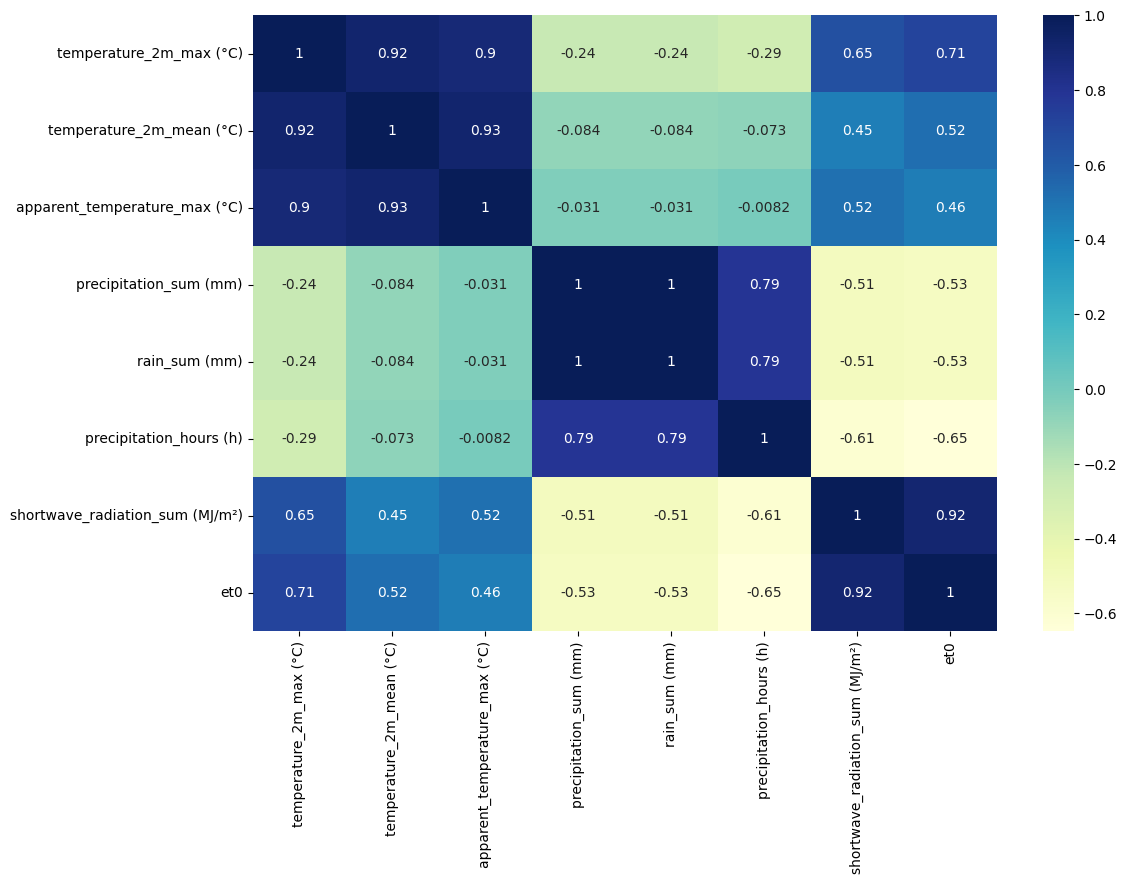

In [107]:
df_high_corr = df[high_corr.index]
df_high_corr = df_high_corr.drop(columns=['weathercode (wmo code)'])

plt.figure(figsize = (12, 8))
sns.heatmap(df_high_corr.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [106]:
# df_high_corr.to_csv('../datasets/pre_train.csv', index=False, encoding ='utf-8-sig')

In [102]:
df_high_corr.columns

Index(['temperature_2m_max (°C)', 'temperature_2m_mean (°C)',
       'apparent_temperature_max (°C)', 'precipitation_sum (mm)',
       'rain_sum (mm)', 'precipitation_hours (h)',
       'shortwave_radiation_sum (MJ/m²)', 'et0'],
      dtype='object')

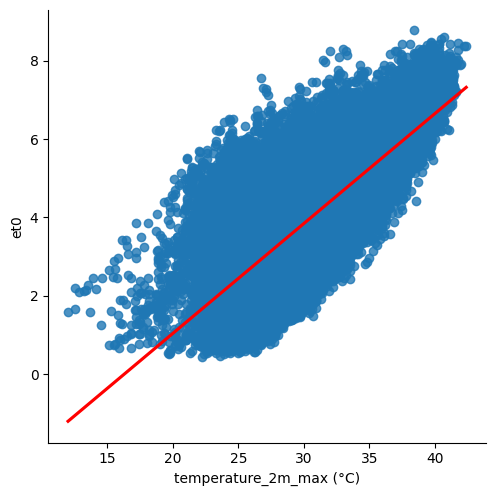

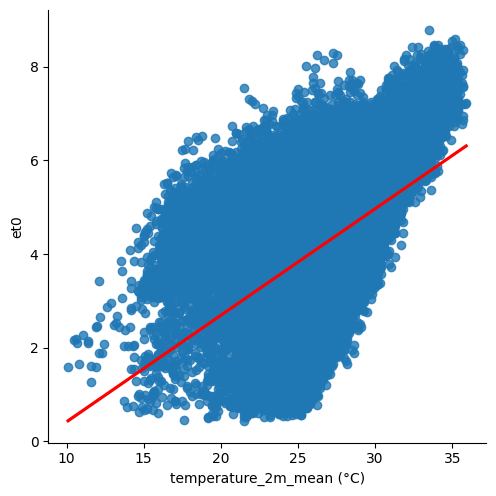

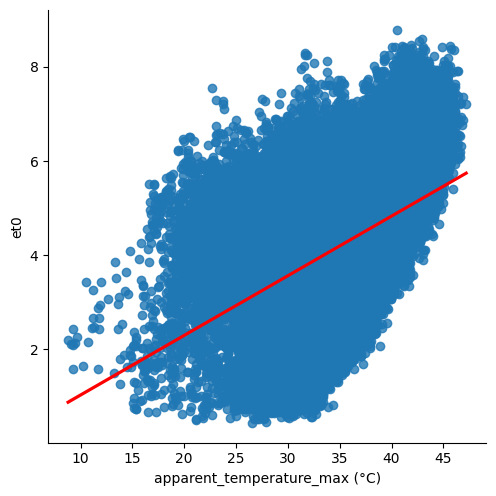

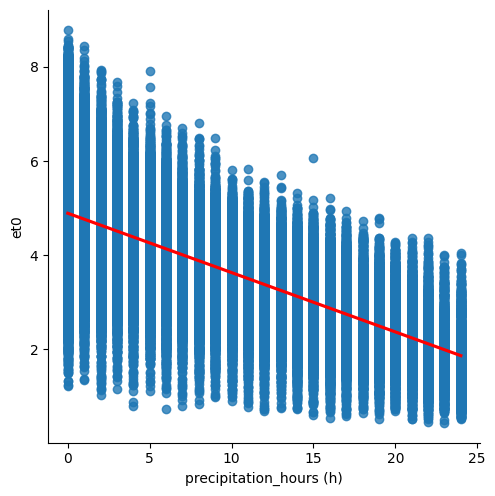

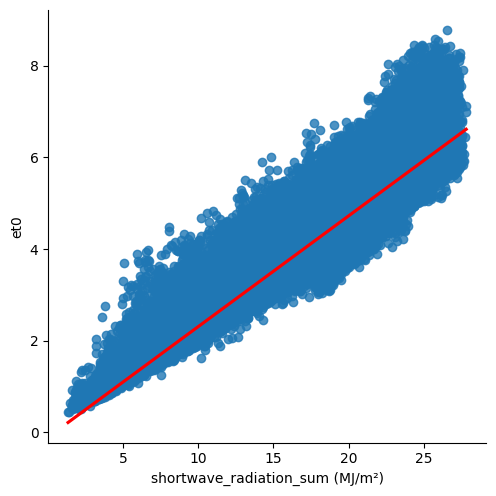

In [103]:
for col in ['temperature_2m_max (°C)', 'temperature_2m_mean (°C)', 'apparent_temperature_max (°C)',  'precipitation_hours (h)','shortwave_radiation_sum (MJ/m²)']:
    sns.pairplot(df_high_corr, x_vars=col, y_vars='et0',size=5, aspect=1, kind='reg',plot_kws={'line_kws':{'color':'red'}})
    plt.show()

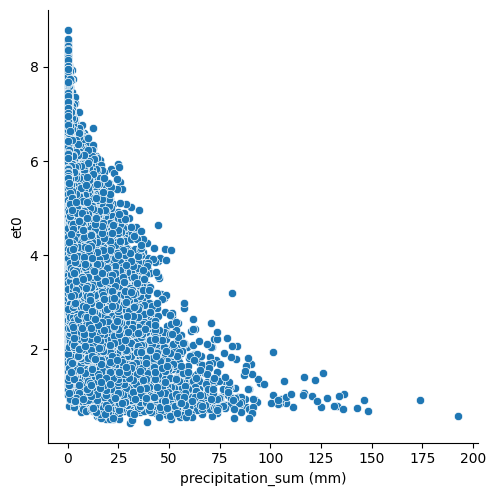

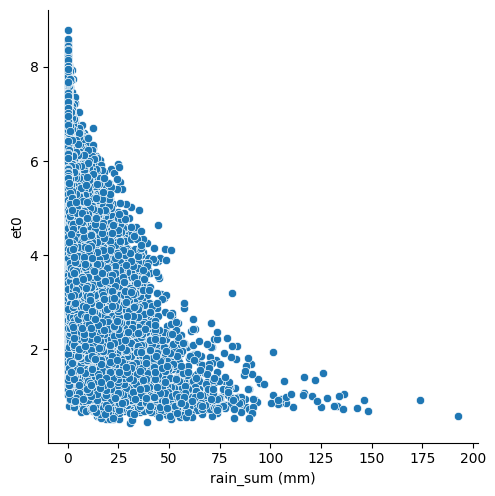

In [104]:
for col in ['precipitation_sum (mm)', 'rain_sum (mm)',]:
    sns.pairplot(df_high_corr, x_vars=col, y_vars='et0',size=5, aspect=1)
    plt.show()

In [105]:
# sns.histplot(df['shortwave_radiation_sum'], bins=5, kde=True, color='skyblue')
# plt.xlabel('Values')
# plt.ylabel('Frequency')
# plt.title('Histogram Example')
# plt.show()